<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 2: Rules on Rules on Rules </h2>



In [2]:
import matplotlib.pyplot as plt
import pickle as pickle

pickleFileName = 'data/fingerDataSet' + '.pickle'
with open(pickleFileName, 'rb') as pickleFile:
    data = pickle.load(pickleFile, encoding='bytes')

"data" is a list of python dicts containing lots of precoumputed information we'll find useful as the series progresses:

In [3]:
len(data)

54

In [4]:
data[0].keys()

dict_keys([b'box', b'boxHeight', b'handPoints', b'trackingIndices', b'allFingerPoints', b'boxWidth', b'image', b'boxEdges', b'croppedImage', b'numFingers', b'numPointsInBox', b'handEdges', b'indexFingerPoints', b'picCount', b'image1bit'])

## Have a look at a few examples

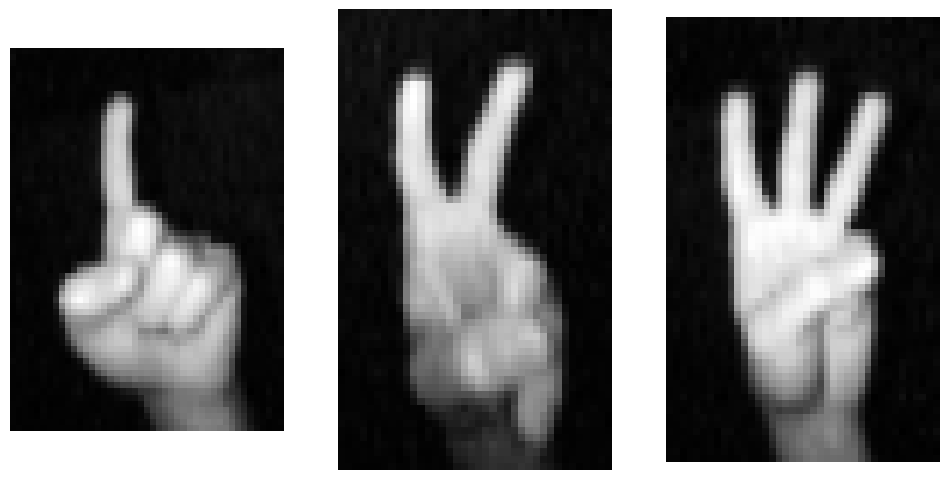

In [5]:
fig = plt.figure(0, figsize=(12,8))
exampleIndices = [7, 30, 46]

for i, exampleIndex in enumerate(exampleIndices):
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(data[exampleIndex][b'croppedImage'], cmap='gray', interpolation='none')
    ax.axis('off')

## Downsample from 8 bits to just 1

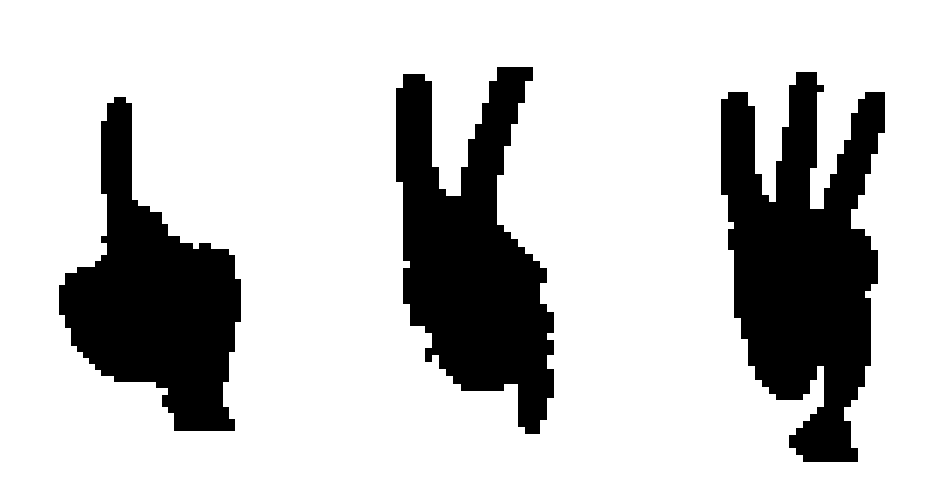

In [11]:
fig = plt.figure(0, figsize=(12,8))
exampleIndices = [7, 30, 46]

for i, exampleIndex in enumerate(exampleIndices):
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(data[exampleIndex][b'croppedImage']<92, cmap='gray', interpolation='none')
    ax.axis('off')

For convenience, 1 bit images have also been precomputed:

In [12]:
ax.imshow(data[0][b'image1bit'][data[0][b'boxEdges'][2]:data[0][b'boxEdges'][3], \
                                       data[0][b'boxEdges'][0]:data[0][b'boxEdges'][1]],\
                                      cmap = 'rainbow', interpolation = 'none')

# Extract 9x9 example grids from images

In [13]:
import importlib
import supportFunctions
importlib.reload(supportFunctions)

examples = [data[index] for index in exampleIndices]
X, y = supportFunctions.extractExamplesFromList(examples, whichImage = \
                               b'image1bit', dist = 4)

9x9 examples are unrolled into larger matrix, X. y contains labels, 0 indicates not a finger, 1 indicates a finger.

In [14]:
print (X.shape, y.shape)

(7867, 81) (7867,)


Our 9x9 grids now just contains ones and zeros:

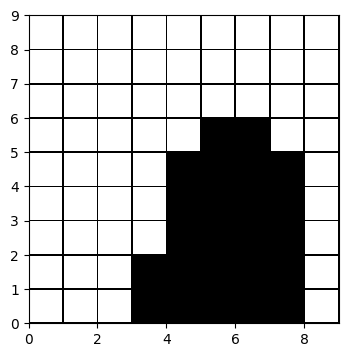

In [15]:
import numpy as np

exampleToShow = X[421,:].reshape(9,9)

fig = plt.figure(0, (4, 4))
plt.pcolor(np.flipud(exampleToShow), cmap = 'Greys',  linewidth =.5, \
              color = 'k', vmin = 0, vmax = 1)

In [16]:
print(exampleToShow.astype('int'))

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 0]]


# Let's make a (simple) rule to classify fingers

In [17]:
rule1 = np.array(([[0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 1, 1, 0, 0]])) 

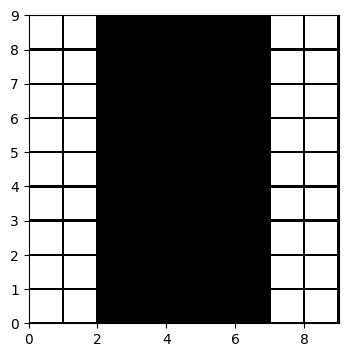

In [18]:
plt.figure(0, (4,4))
plt.pcolor(np.flipud(rule1), cmap = 'Greys',  linewidth =1, \
       color = 'k', vmin = 0, vmax = 1)

Search for matches to our new rule in our data:

In [19]:
difference = X-rule1.ravel()
np.where(~difference.any(axis=1))[0]

array([ 737,  782,  827,  872, 3415, 3453, 3491, 5957, 5997])

Found some matches! Let's visualize these suckers. We'll have to do this going through images ones at a time:

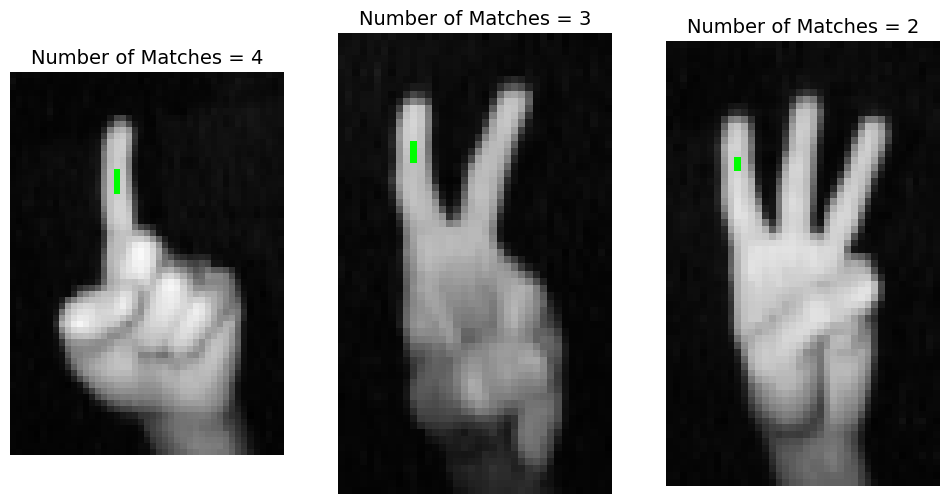

In [20]:
import importlib
importlib.reload(supportFunctions)
fig = plt.figure(0, (12, 6))
supportFunctions.showMatches(rules = [rule1], exampleIndices = exampleIndices, \
            data=data, fig=fig)

Create some more rules by shifting our finger pattern around

In [21]:
ruleToSample = np.array(([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]]))

In [22]:
rules = []
for i in range(6):
    for j in range(5):
        rules.append(ruleToSample[i:i+9, j:j+9])

In [23]:
len(rules)

30

NameError: name 'axis' is not defined

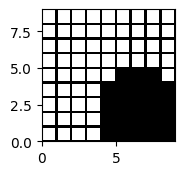

In [24]:
fig = plt.figure(0, (10,12))
for i, rule in enumerate(rules):
    plt.subplot(6,5,i+1)
    p = plt.pcolor(np.flipud(rule), cmap = 'Greys',  linewidth =1, \
                  color = 'k', vmin = 0, vmax = 1)
    axis('off')

We now have 30 rules, let's try them out!!!

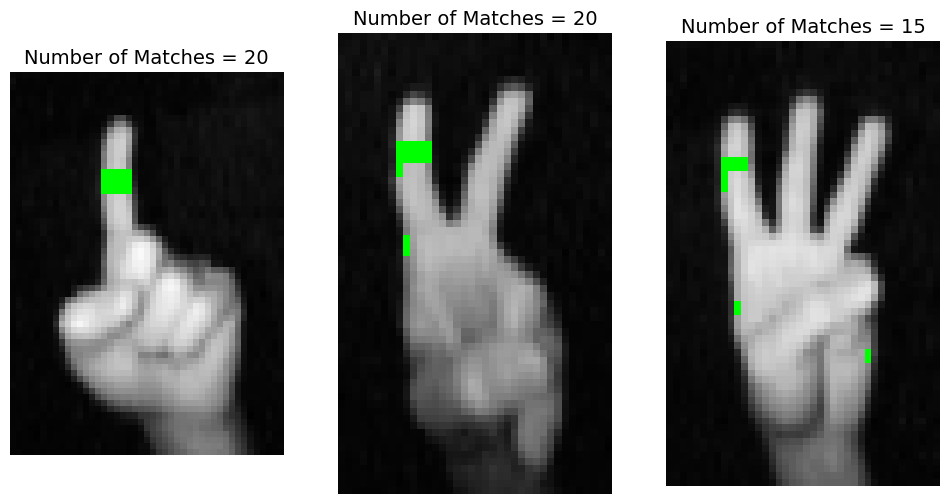

In [ ]:
fig = plt.figure(0, (12, 6))
supportFunctions.showMatches(rules = rules, exampleIndices = exampleIndices, \
            data=data, fig=fig)

Ok, more matches!

## How are we doing? 
- Let's quanitify our performance
- To do this, we need correct labels. 
- We could label pixels by hand :), but we'll use leap motion software to save time. See preprocessin code and leap motion code for more detail.

### Finger labels from Leap Motion software
- These aren't perfect, but we'll assume they're close enough and let these lables be our "ground truth".

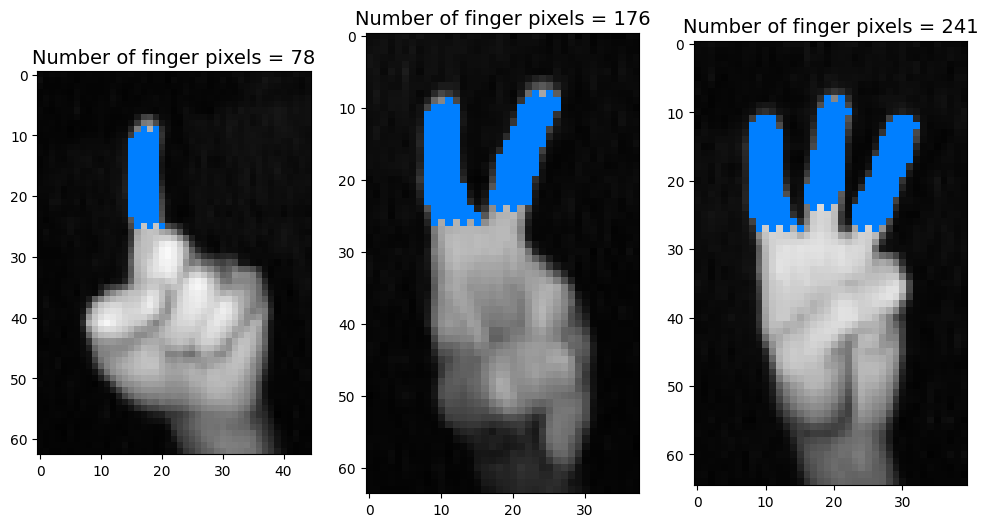

In [ ]:
fig = plt.figure(0, (12, 6))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    imageDict = data[exampleIndices[i]]
    
    X1, y1 = supportFunctions.extractFeatures(imageDict, whichImage = b'image1bit', dist = 4)    
    yImage = y1.reshape(imageDict[b'boxHeight'], imageDict[b'boxWidth'])
    
    im = supportFunctions.makeGrayScale(imageDict)
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 0
    im[:,:,1][yImage==1] = .5
    im[:,:,2][yImage==1] = 1
    
    plt.imshow(im)
    plt.title('Number of finger pixels = ' + str(sum(y1==1)), fontsize = 14)

## Compute confusion matrix

In [ ]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = X - rule.ravel()
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

# Make yHat vector, tells us which 
# pixels our rules predict to be fingers.
yHat = np.zeros(X.shape[0])
yHat[matchingIndices] = 1

# Count up False Negatives, False Positives, 
# True Positives, and True Negatives
FN =  np.sum(np.logical_and(y==1, yHat==0))
FP =  np.sum(np.logical_and(y==0, yHat==1))
TP = np.sum(np.logical_and(y==1, yHat==1))
TN = np.sum(np.logical_and(y==0, yHat==0))
    
# Make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[  48  447]
 [   7 7365]]


Performance is not so great!

## Multi Color Plot for big table
- Take out later

Confusion Matrix:
[[  48  447]
 [   7 7365]]
Recall (TPR) = 0.097 (Portion of fingers that we "caught")
Precision (PPV) = 0.873(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.942


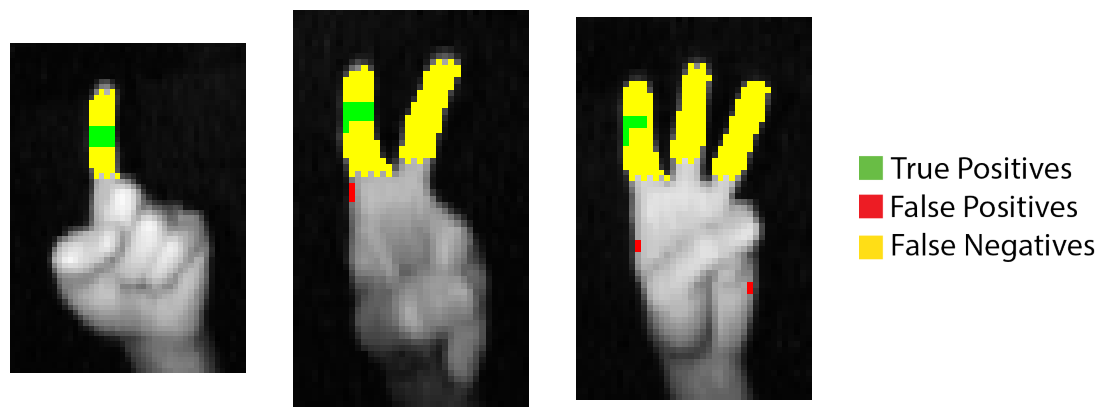

In [ ]:
fig = plt.figure(0, (14, 8))
supportFunctions.testRules(rules, exampleIndices, data, fig, X, y)

In [ ]:
#Return to just using 3 images at training data:
trainingExampleIndices = [7, 30, 46]
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = supportFunctions.extractExamplesFromList(trainingExamples, whichImage = b'image1bit', dist = 4)

#And two for testing:
testingExampleIndices = [34, 45]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = supportFunctions.extractExamplesFromList(testingExamples, whichImage = b'image1bit', dist = 4)

Confusion Matrix:
[[  55  341]
 [  15 4890]]
Recall (TPR) = 0.139 (Portion of fingers that we "caught")
Precision (PPV) = 0.786(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.933


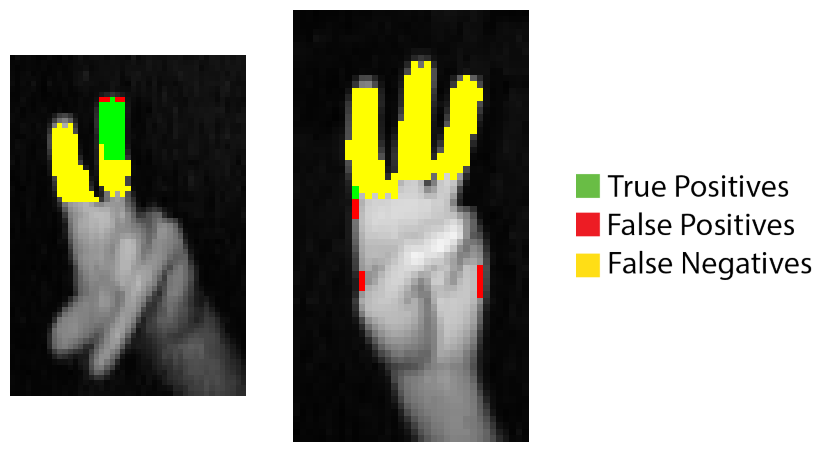

In [ ]:
fig = plt.figure(0, (14, 8))
supportFunctions.testRules(rules, testingExampleIndices, data, fig, testX, testY)

In [ ]:
rules = []

Confusion Matrix:
[[   0  396]
 [   0 4905]]
Recall (TPR) = 0.0 (Portion of fingers that we "caught")
Precision (PPV) = 0.0(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.925


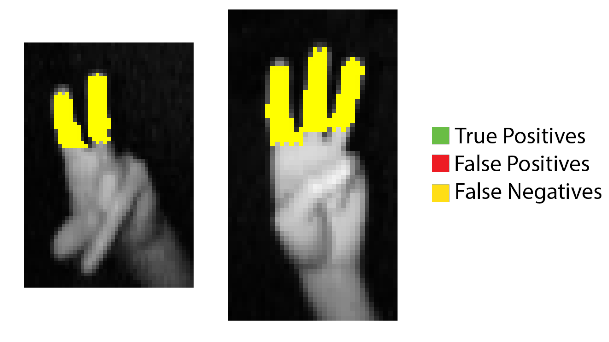

In [ ]:
fig = plt.figure(0, (14, 8))
supportFunctions.testRules(rules, testingExampleIndices, data, fig, testX, testY)

Confusion Matrix:
[[   0  495]
 [   0 7372]]
Recall (TPR) = 0.0 (Portion of fingers that we "caught")
Precision (PPV) = 0.0(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.937


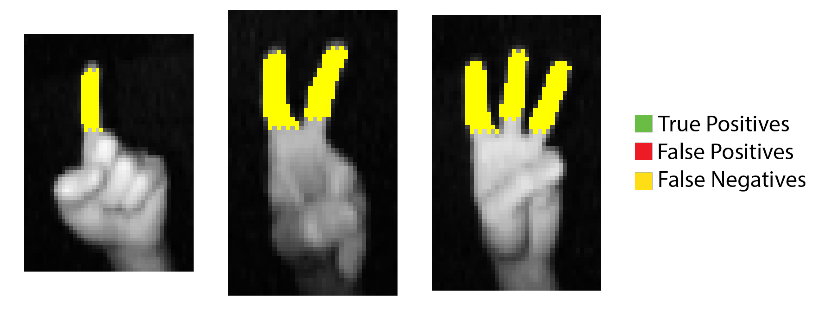

In [ ]:
fig = plt.figure(0, (14, 8))
supportFunctions.testRules(rules, trainingExampleIndices, data, fig, trainX, trainY)